# Lesson 0013 - MNIST Classification k-nearest neighbor
We assume the reader to be familiar with the preceeding lessons.<br>
In this lesson, we apply the k-nearest neighbor scheme to the MNIST dataset.<br>
We steal the preprocessing from lesson [lesson 0011](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0011_mnist_classification_support_vector_machine_boosting.ipynb) and the k-nearest neighbor code from [lesson 0005](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0005_iris_classification_k_nearest_neighbor.ipynb).

In [1]:
import tensorflow as tf

tf.set_random_seed( 1234567890 )

print( tf.__version__ )

C:\Users\Robert\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0


In [2]:
( train_x, train_y ),( test_x, test_y ) = tf.keras.datasets.mnist.load_data()

In [3]:
import numpy as np

np.random.seed( 1234567890 )

print( np.__version__ )

1.14.3


In [4]:
mu = np.mean( train_x )

sigma = np.std( train_x )



train_x = ( train_x - mu ) / sigma

test_x = ( test_x - mu ) / sigma

In [5]:
train_x_f = np.zeros( shape = [ 60000, 28 * 28 ] )

test_x_f = np.zeros( shape = [ 10000, 28 * 28 ] )



    

for i in range( 60000 ):
    
    dummy = np.array( train_x[ i ] )
    
    train_x_f[ i, : ] = dummy.flatten()
    
    
for i in range( 10000 ):
    
    dummy = np.array( test_x[ i ] )
    
    test_x_f[ i ] = dummy.flatten()
    
    
    
    
train_x = train_x_f

test_x = test_x_f

In [6]:
import sklearn

print( sklearn.__version__ )

0.19.1


In [7]:
from sklearn.neighbors import KNeighborsClassifier as knn

We train a nearest neighbor model __nn__ using __knn__ out of the box, predict the __test_x__ set, store the comparison in __hit__ and compute the __accuracy__.

In [8]:
nn = knn()

nn.fit( train_x, train_y )

hit = ( nn.predict( test_x ) == test_y )

accuracy = 0.0

for i in range( 10000 ):
    
    if hit[ i ]:
        
        accuracy = accuracy + 1.0
        
accuracy = accuracy / 100

print( 'We reached an accuracy of ' + str( accuracy ) + '%' )

We reached an accuracy of 96.88%


So we reached an accuracy of nearly $97\%$.<br>
We want to try a grid search over the number of neighbors that are considered.<br>
We start the size of the neighborhood at $1$ and scale up to $1000$. The more neighbors we consider, the better the model should be able to deal with noise.<br>
We will split the training data into a second training set of $50000$ and a validation set of $10000$ randomly drawn data.
For this, we will steal code from [lesson 0012](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0012_mnist_classification_decision_tree_and_random_forest.ipynb).

In [9]:
train_2_x = np.zeros( shape = [ 50000, 28 * 28 ] )

train_2_y = np.zeros( shape = [ 50000 ] )

val_2_x = np.zeros( shape = [ 10000, 28 * 28 ] )

val_2_y = np.zeros( shape = [ 10000 ] )




random_integers = np.random.choice( range( 60000 ), 50000, replace = False )

random_integers = np.sort( random_integers )



j = 0

k = 0



for i in range( 60000 ):
    
    if i == random_integers[ j ]:
        
        train_2_x[ j, : ] = train_x[ i, : ]
        
        train_2_y[ j ] = train_y[ i ]
        
        j = j + 1
        
        if j == 50000:
            
            j = 0
            
    else:
        
        val_2_x[ k, : ] = train_x[ i, : ]
        
        val_2_y[ k ] = train_y[ i ]
        
        k = k + 1

In [10]:
grid = [ 1, 3, 5, 10, 25, 50, 75, 100, 150, 200, 250, 350, 500, 750, 1000 ]

grid_val = []

for i in range( len( grid ) ):
    
    nn_2 = knn( n_neighbors = grid[ i ] )
    
    nn_2.fit( train_2_x, train_2_y )

    hit_2 = ( nn_2.predict( val_2_x ) == val_2_y )

    accuracy_2 = 0.0

    for i in range( 10000 ):
    
        if hit_2[ i ]:
        
            accuracy_2 = accuracy_2 + 1.0
        
    accuracy_2 = accuracy_2 / 100
    
    grid_val.append( accuracy_2 )

In [11]:
import matplotlib as matplotlib
import matplotlib.pyplot as plt

print( matplotlib.__version__ )

2.2.2


Text(0,0.5,'Accuracy (%)')

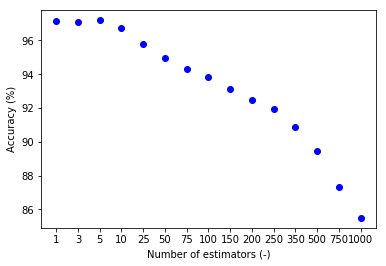

In [12]:
plt.plot( grid_val, 'bo' )

plt.xticks( range( len( grid ) ), grid )

plt.xlabel( 'Number of estimators (-)' )

plt.ylabel( 'Accuracy (%)' )

Seems like $5$ neighbors deliver the best classification.<br>
According to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) the default number of neighbors is $5$, therefore __nn__ is already the best model, and we are done.<br>
Class dismissed.